In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score 
import matplotlib.pyplot as plt  
import os
import joblib
from IPython.display import display
plt.style.use('seaborn')

In [2]:
df1 = pd.read_csv(r"C:\Users\Mounisha S\OneDrive\Desktop\CSV1.csv")
df2 = pd.read_csv(r"C:\Users\Mounisha S\OneDrive\Desktop\csv2.csv")
df3 = pd.read_csv(r"C:\Users\Mounisha S\OneDrive\Desktop\csv3.csv")

In [3]:
combined_df = pd.merge(df1, df2, on='SNO', suffixes=('_1', '_2'))
combined_df = pd.merge(combined_df, df3, on='SNO')

# Save the merged dataframe to a new CSV file
combined_df.to_csv('combined.csv', index=False)

In [4]:
combined_df['RENTAL_PRICE '] = combined_df['RENTAL_PRICE ']*83.12

In [5]:
combined_df

,SNO,ADDRESS,CITY,STATE_CODE,COUNTRY,RENTAL_PRICE,DEPOSIT,bed,bathrooms,area,petsallowed,washer,ac,parking,fireplace,dishwasher,hardwood,roofdeck,storage
0,1,5916 Lehman Way,Austin,TX,AUTX,224424.0,0,5,3.0,78747,0,0,0,3,0,0,0,0,0
1,2,10725 Blacket Dr,Austin,TX,AVAL,228580.0,0,4,3.0,78747,0,0,0,0,0,0,0,0,0
2,3,2910 Cedarview Dr,Austin,TX,AUTX,602620.0,0,3,2.0,78704,0,0,0,2,0,0,0,0,0
3,4,3812 Southway Dr,Austin,TX,RNTR,228580.0,0,2,2.0,78704,0,0,0,0,0,0,0,0,0
4,5,222 West Ave,Austin,TX,AUTX,245204.0,0,1,1.0,78701,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,6230,3668 Bradley Rd,Westlake,OH,NEOH,191176.0,0,3,2.0,45239,0,0,0,0,0,0,0,0,0
6227,6231,3605 Randolph Rd,Cleveland Heights,OH,NEOH,97666.0,0,3,2.0,45067,0,0,0,0,0,0,0,0,0
6228,6232,6074 N Norwell Dr,Dayton,OH,DAOH,91432.0,0,3,2.0,43068,0,0,0,0,0,0,0,0,0
6229,6233,7033 Acre Dr,Cincinnati,OH,RNTL,143382.0,0,3,1.0,45373,0,0,0,0,0,0,0,0,0


In [6]:
combined_df.columns

Index(['SNO', 'ADDRESS', 'CITY', 'STATE_CODE ', 'COUNTRY ', 'RENTAL_PRICE ',
       'DEPOSIT', 'bed', 'bathrooms', 'area', 'petsallowed', 'washer', 'ac',
       'parking', 'fireplace', 'dishwasher', 'hardwood', 'roofdeck',
       'storage'],
      dtype='object')

In [7]:
print(combined_df.head())

   SNO             ADDRESS    CITY STATE_CODE  COUNTRY   RENTAL_PRICE   \
0    1    5916  Lehman Way  Austin          TX     AUTX       224424.0   
1    2   10725  Blacket Dr  Austin          TX     AVAL       228580.0   
2    3  2910  Cedarview Dr  Austin          TX     AUTX       602620.0   
3    4   3812  Southway Dr  Austin          TX     RNTR       228580.0   
4    5       222  West Ave  Austin          TX     AUTX       245204.0   

   DEPOSIT  bed  bathrooms   area  petsallowed  washer  ac  parking  \
0        0    5        3.0  78747            0       0   0        3   
1        0    4        3.0  78747            0       0   0        0   
2        0    3        2.0  78704            0       0   0        2   
3        0    2        2.0  78704            0       0   0        0   
4        0    1        1.0  78701            0       0   0        1   

   fireplace  dishwasher  hardwood  roofdeck  storage  
0          0           0         0         0        0  
1          0    

In [8]:
print(combined_df.shape)

(6231, 19)


In [9]:
print(combined_df.columns)

Index(['SNO', 'ADDRESS', 'CITY', 'STATE_CODE ', 'COUNTRY ', 'RENTAL_PRICE ',
       'DEPOSIT', 'bed', 'bathrooms', 'area', 'petsallowed', 'washer', 'ac',
       'parking', 'fireplace', 'dishwasher', 'hardwood', 'roofdeck',
       'storage'],
      dtype='object')


In [10]:
print(combined_df.dtypes)

SNO                int64
ADDRESS           object
CITY              object
STATE_CODE        object
COUNTRY           object
RENTAL_PRICE     float64
DEPOSIT            int64
bed                int64
bathrooms        float64
area               int64
petsallowed        int64
washer             int64
ac                 int64
parking            int64
fireplace          int64
dishwasher         int64
hardwood           int64
roofdeck           int64
storage            int64
dtype: object


# DATA CLEANING

In [11]:
print(combined_df.isnull().sum())

SNO              0
ADDRESS          0
CITY             0
STATE_CODE       0
COUNTRY          0
RENTAL_PRICE     0
DEPOSIT          0
bed              0
bathrooms        1
area             0
petsallowed      0
washer           0
ac               0
parking          0
fireplace        0
dishwasher       0
hardwood         0
roofdeck         0
storage          0
dtype: int64


In [12]:
print(combined_df.describe())

               SNO  RENTAL_PRICE   DEPOSIT          bed    bathrooms  \
count  6231.000000   6.231000e+03   6231.0  6231.000000  6230.000000   
mean   3118.916386   3.100222e+05      0.0     2.855882     1.871589   
std    1799.016219   5.891188e+05      0.0     1.075376     0.792612   
min       1.000000   3.324800e+04      0.0     1.000000     1.000000   
25%    1561.500000   1.496160e+05      0.0     2.000000     1.000000   
50%    3119.000000   2.057220e+05      0.0     3.000000     2.000000   
75%    4676.500000   2.908369e+05      0.0     3.000000     2.000000   
max    6234.000000   2.078000e+07      0.0    15.000000     9.000000   

               area  petsallowed  washer      ac      parking  fireplace  \
count   6231.000000       6231.0  6231.0  6231.0  6231.000000     6231.0   
mean   54056.319210          0.0     0.0     0.0     0.970470        0.0   
std    29499.080594          0.0     0.0     0.0     1.223536        0.0   
min     7002.000000          0.0     0.0     0.

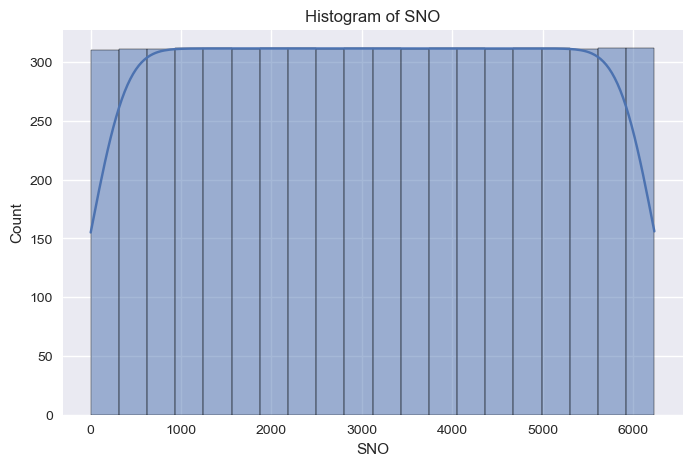

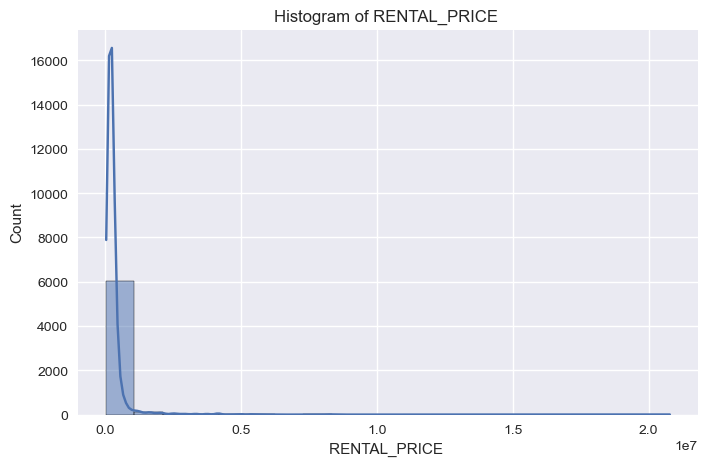

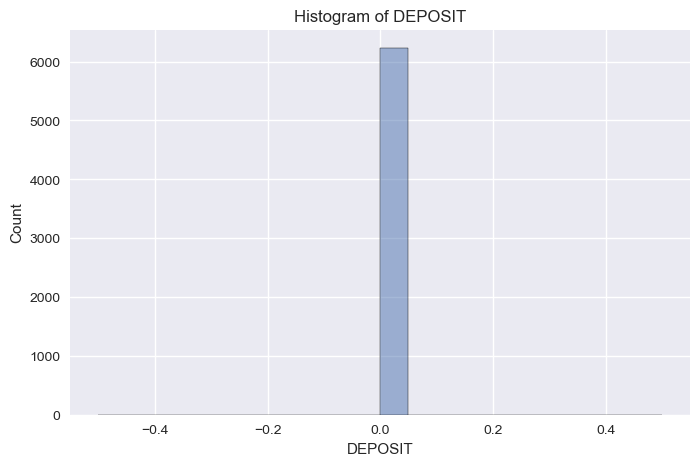

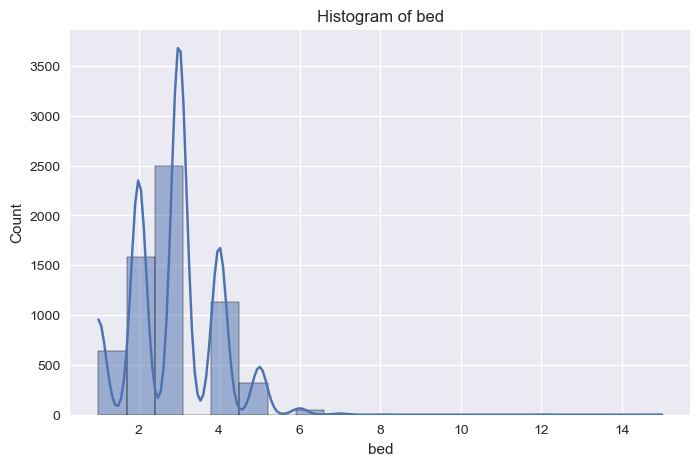

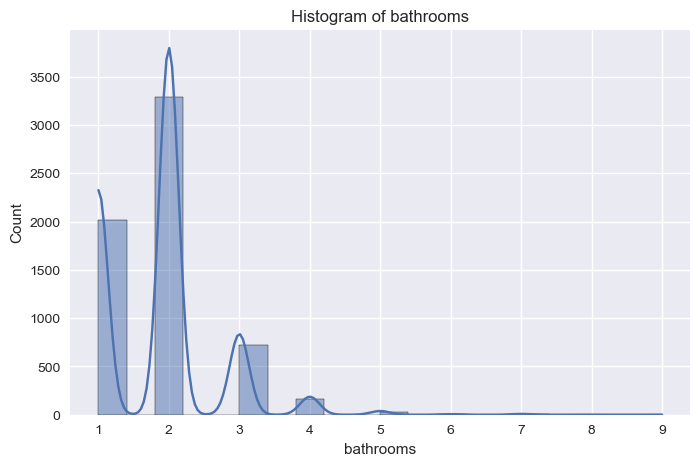

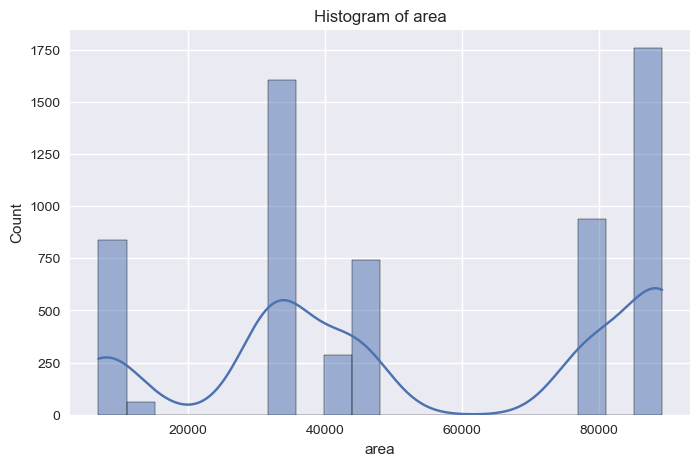

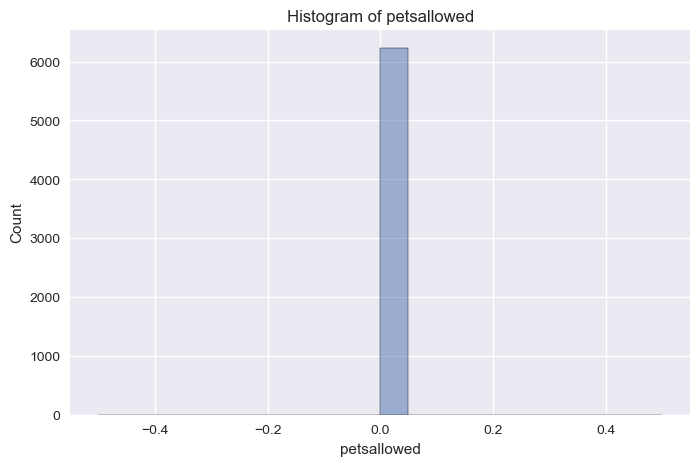

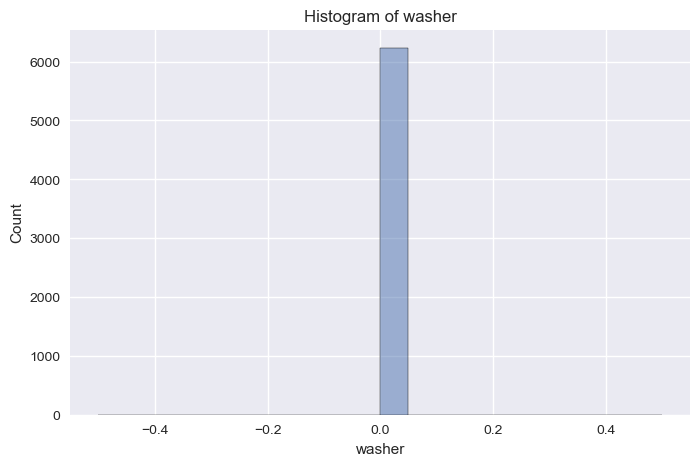

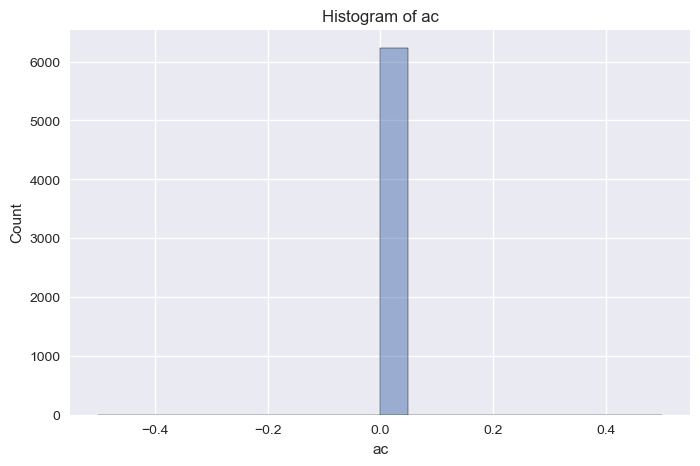

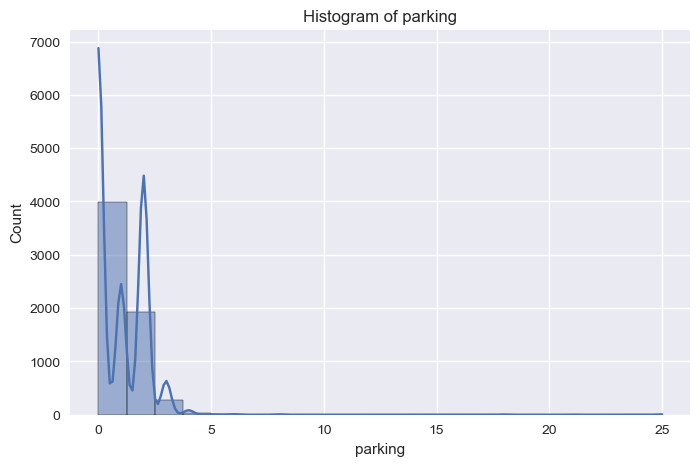

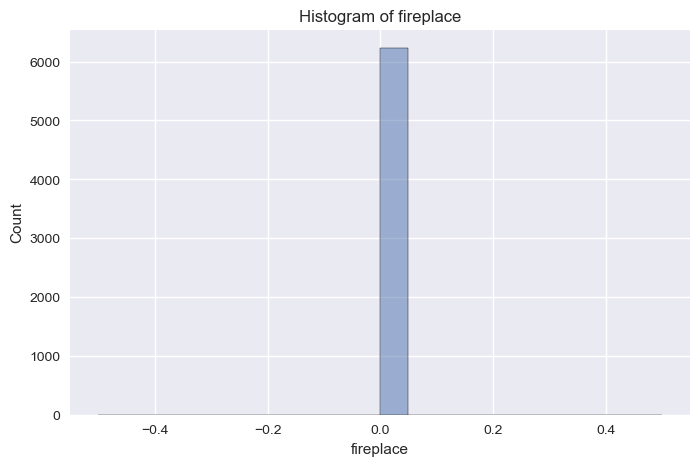

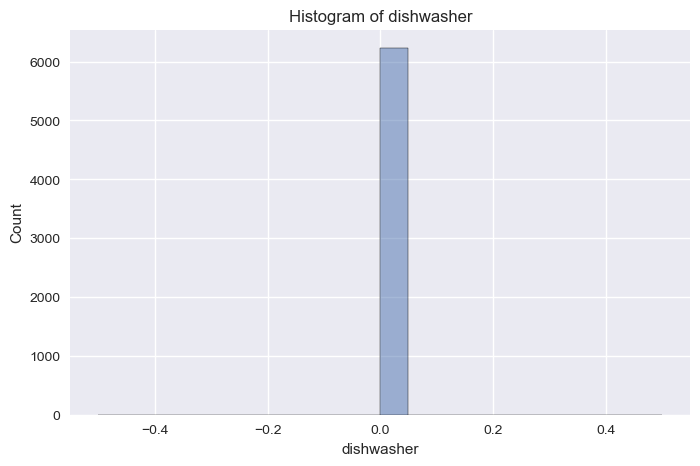

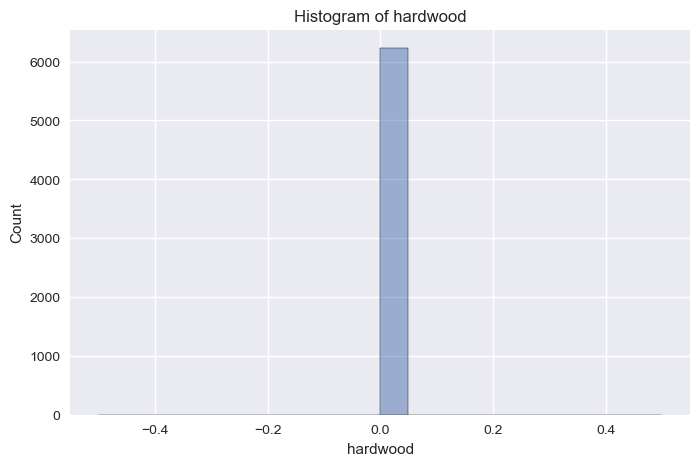

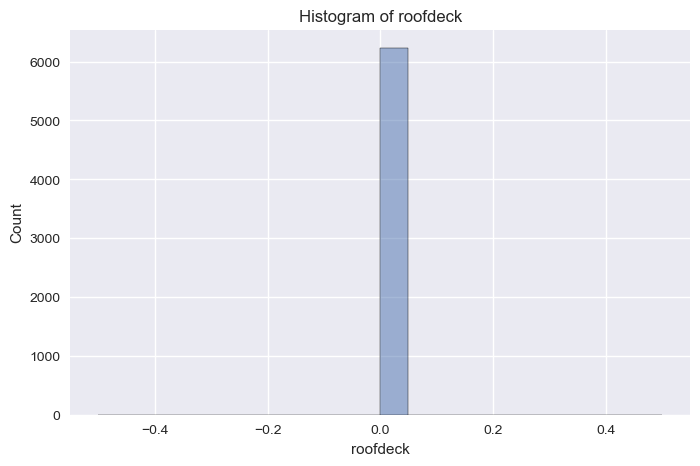

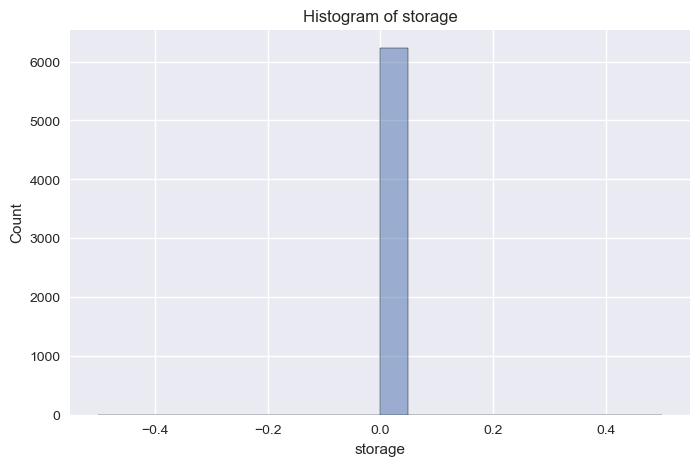

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical variables
for column in combined_df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=combined_df, x=column, bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

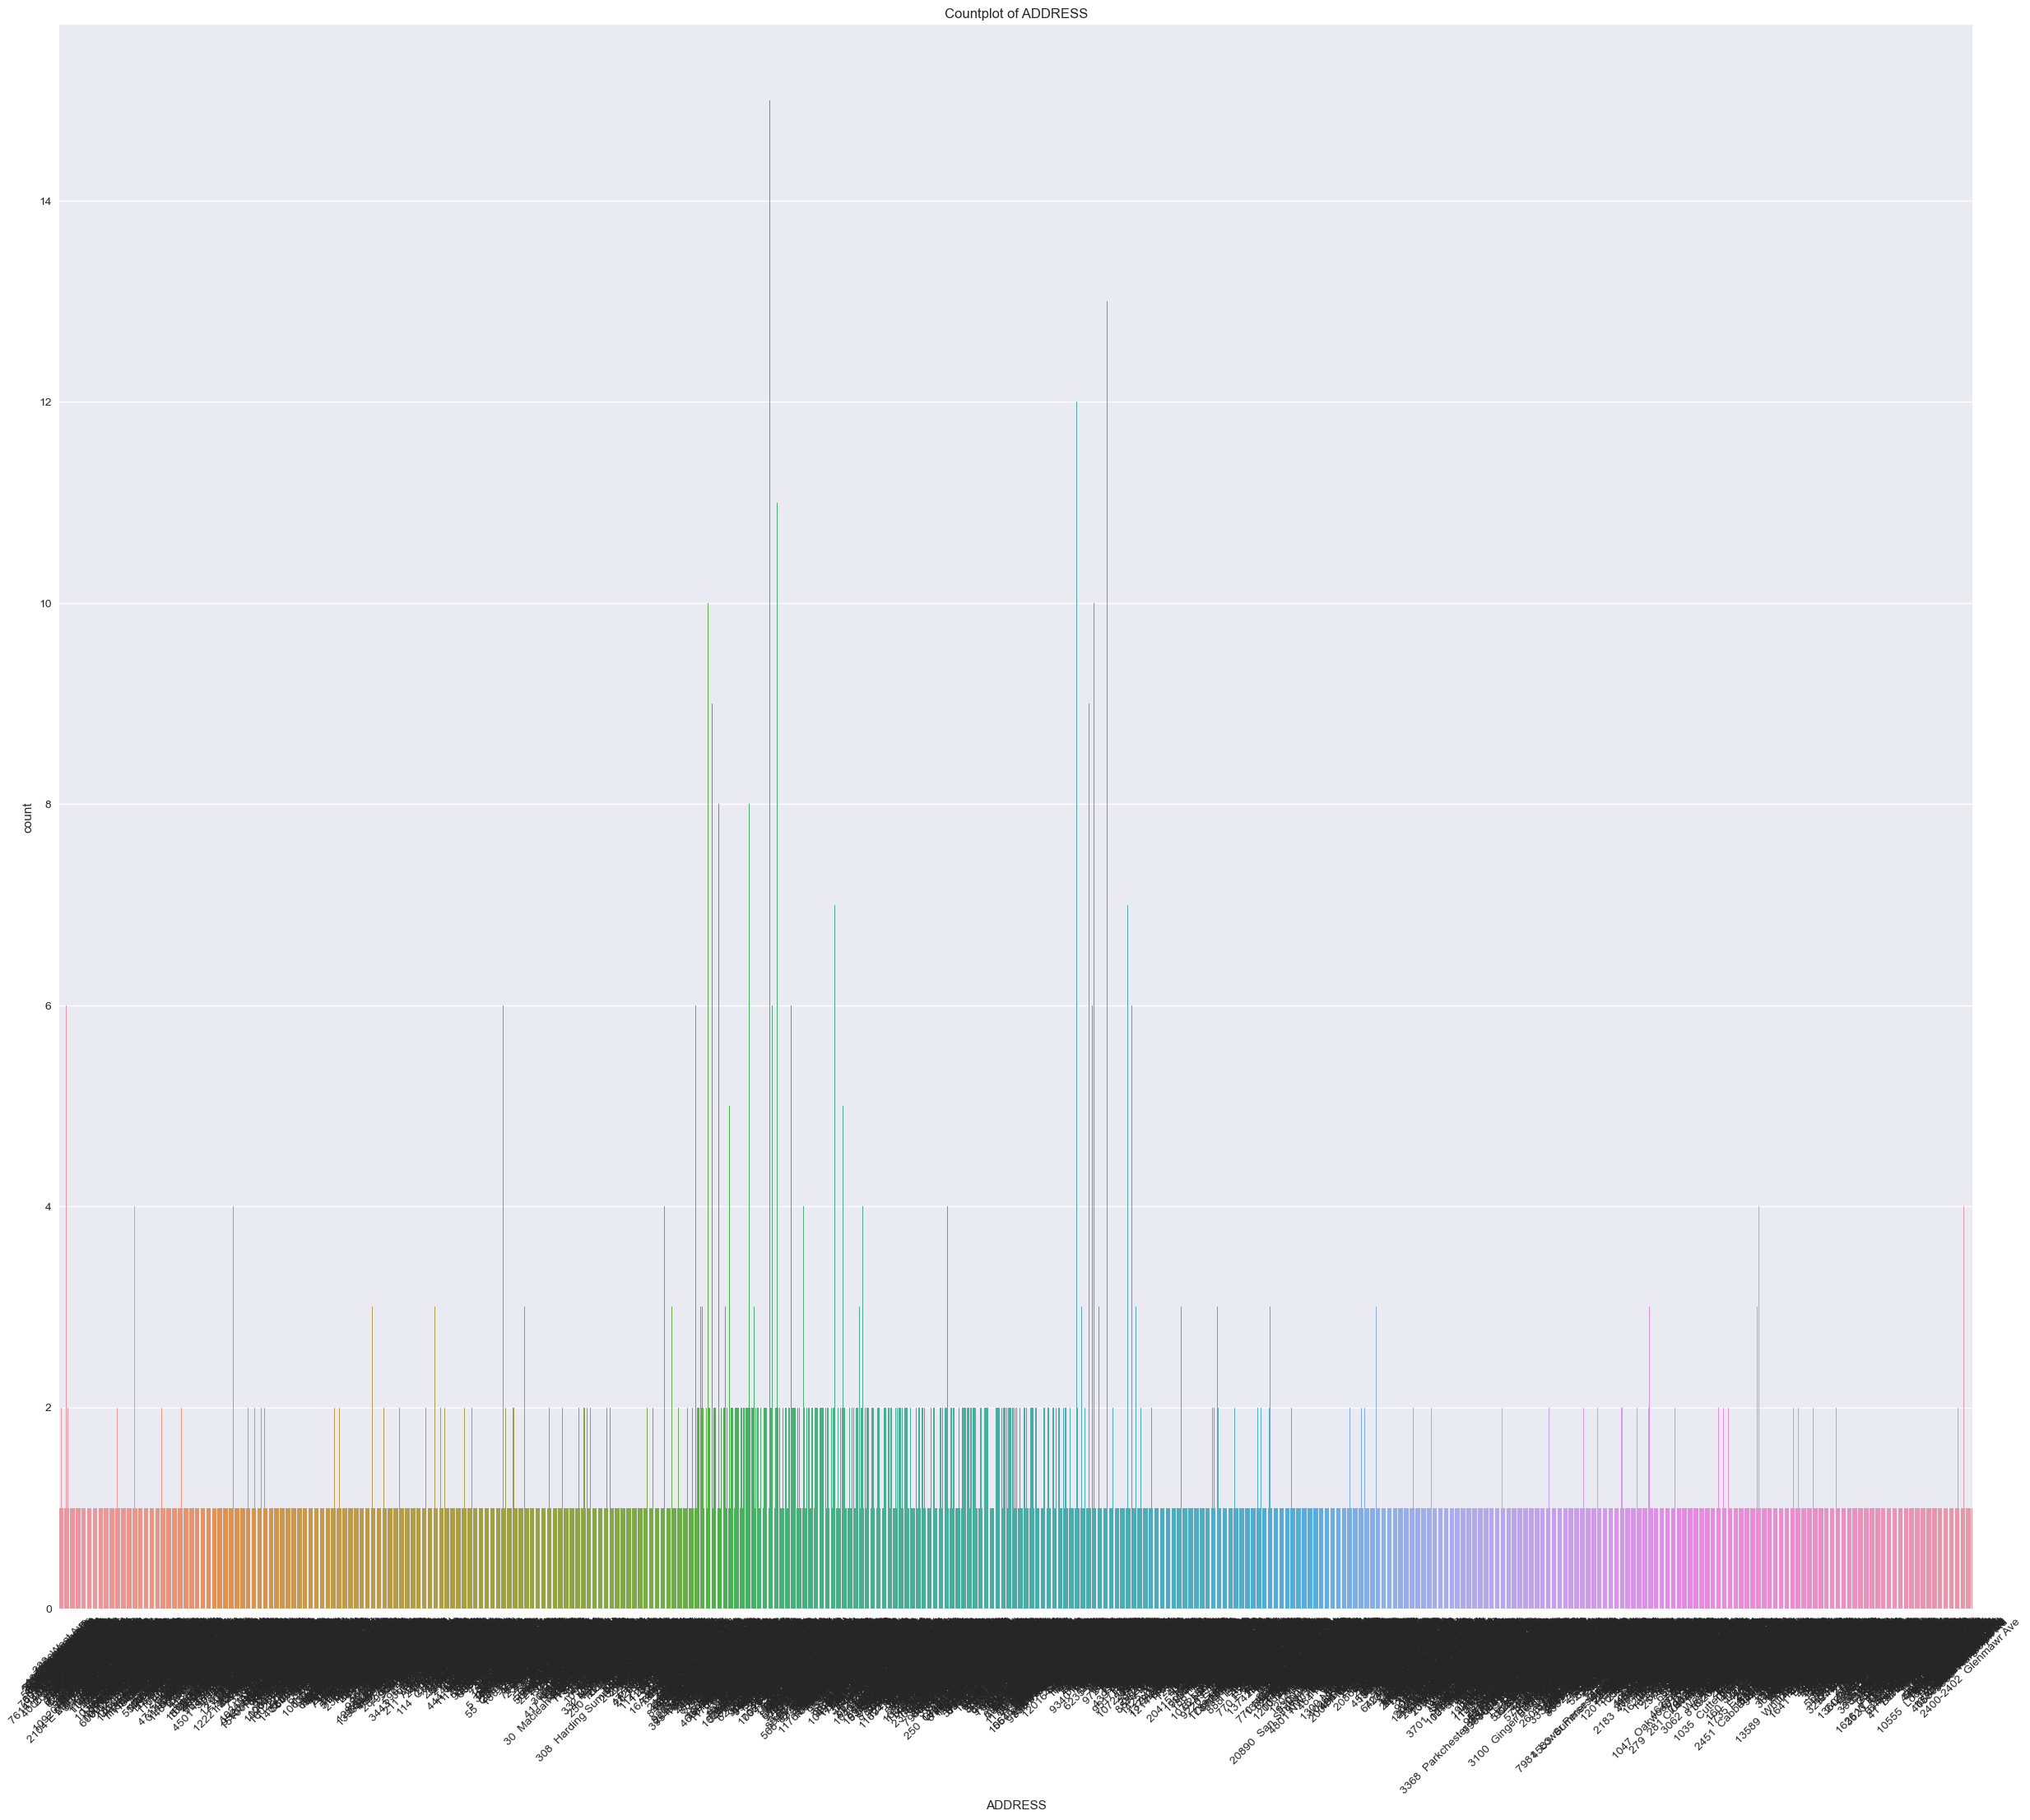

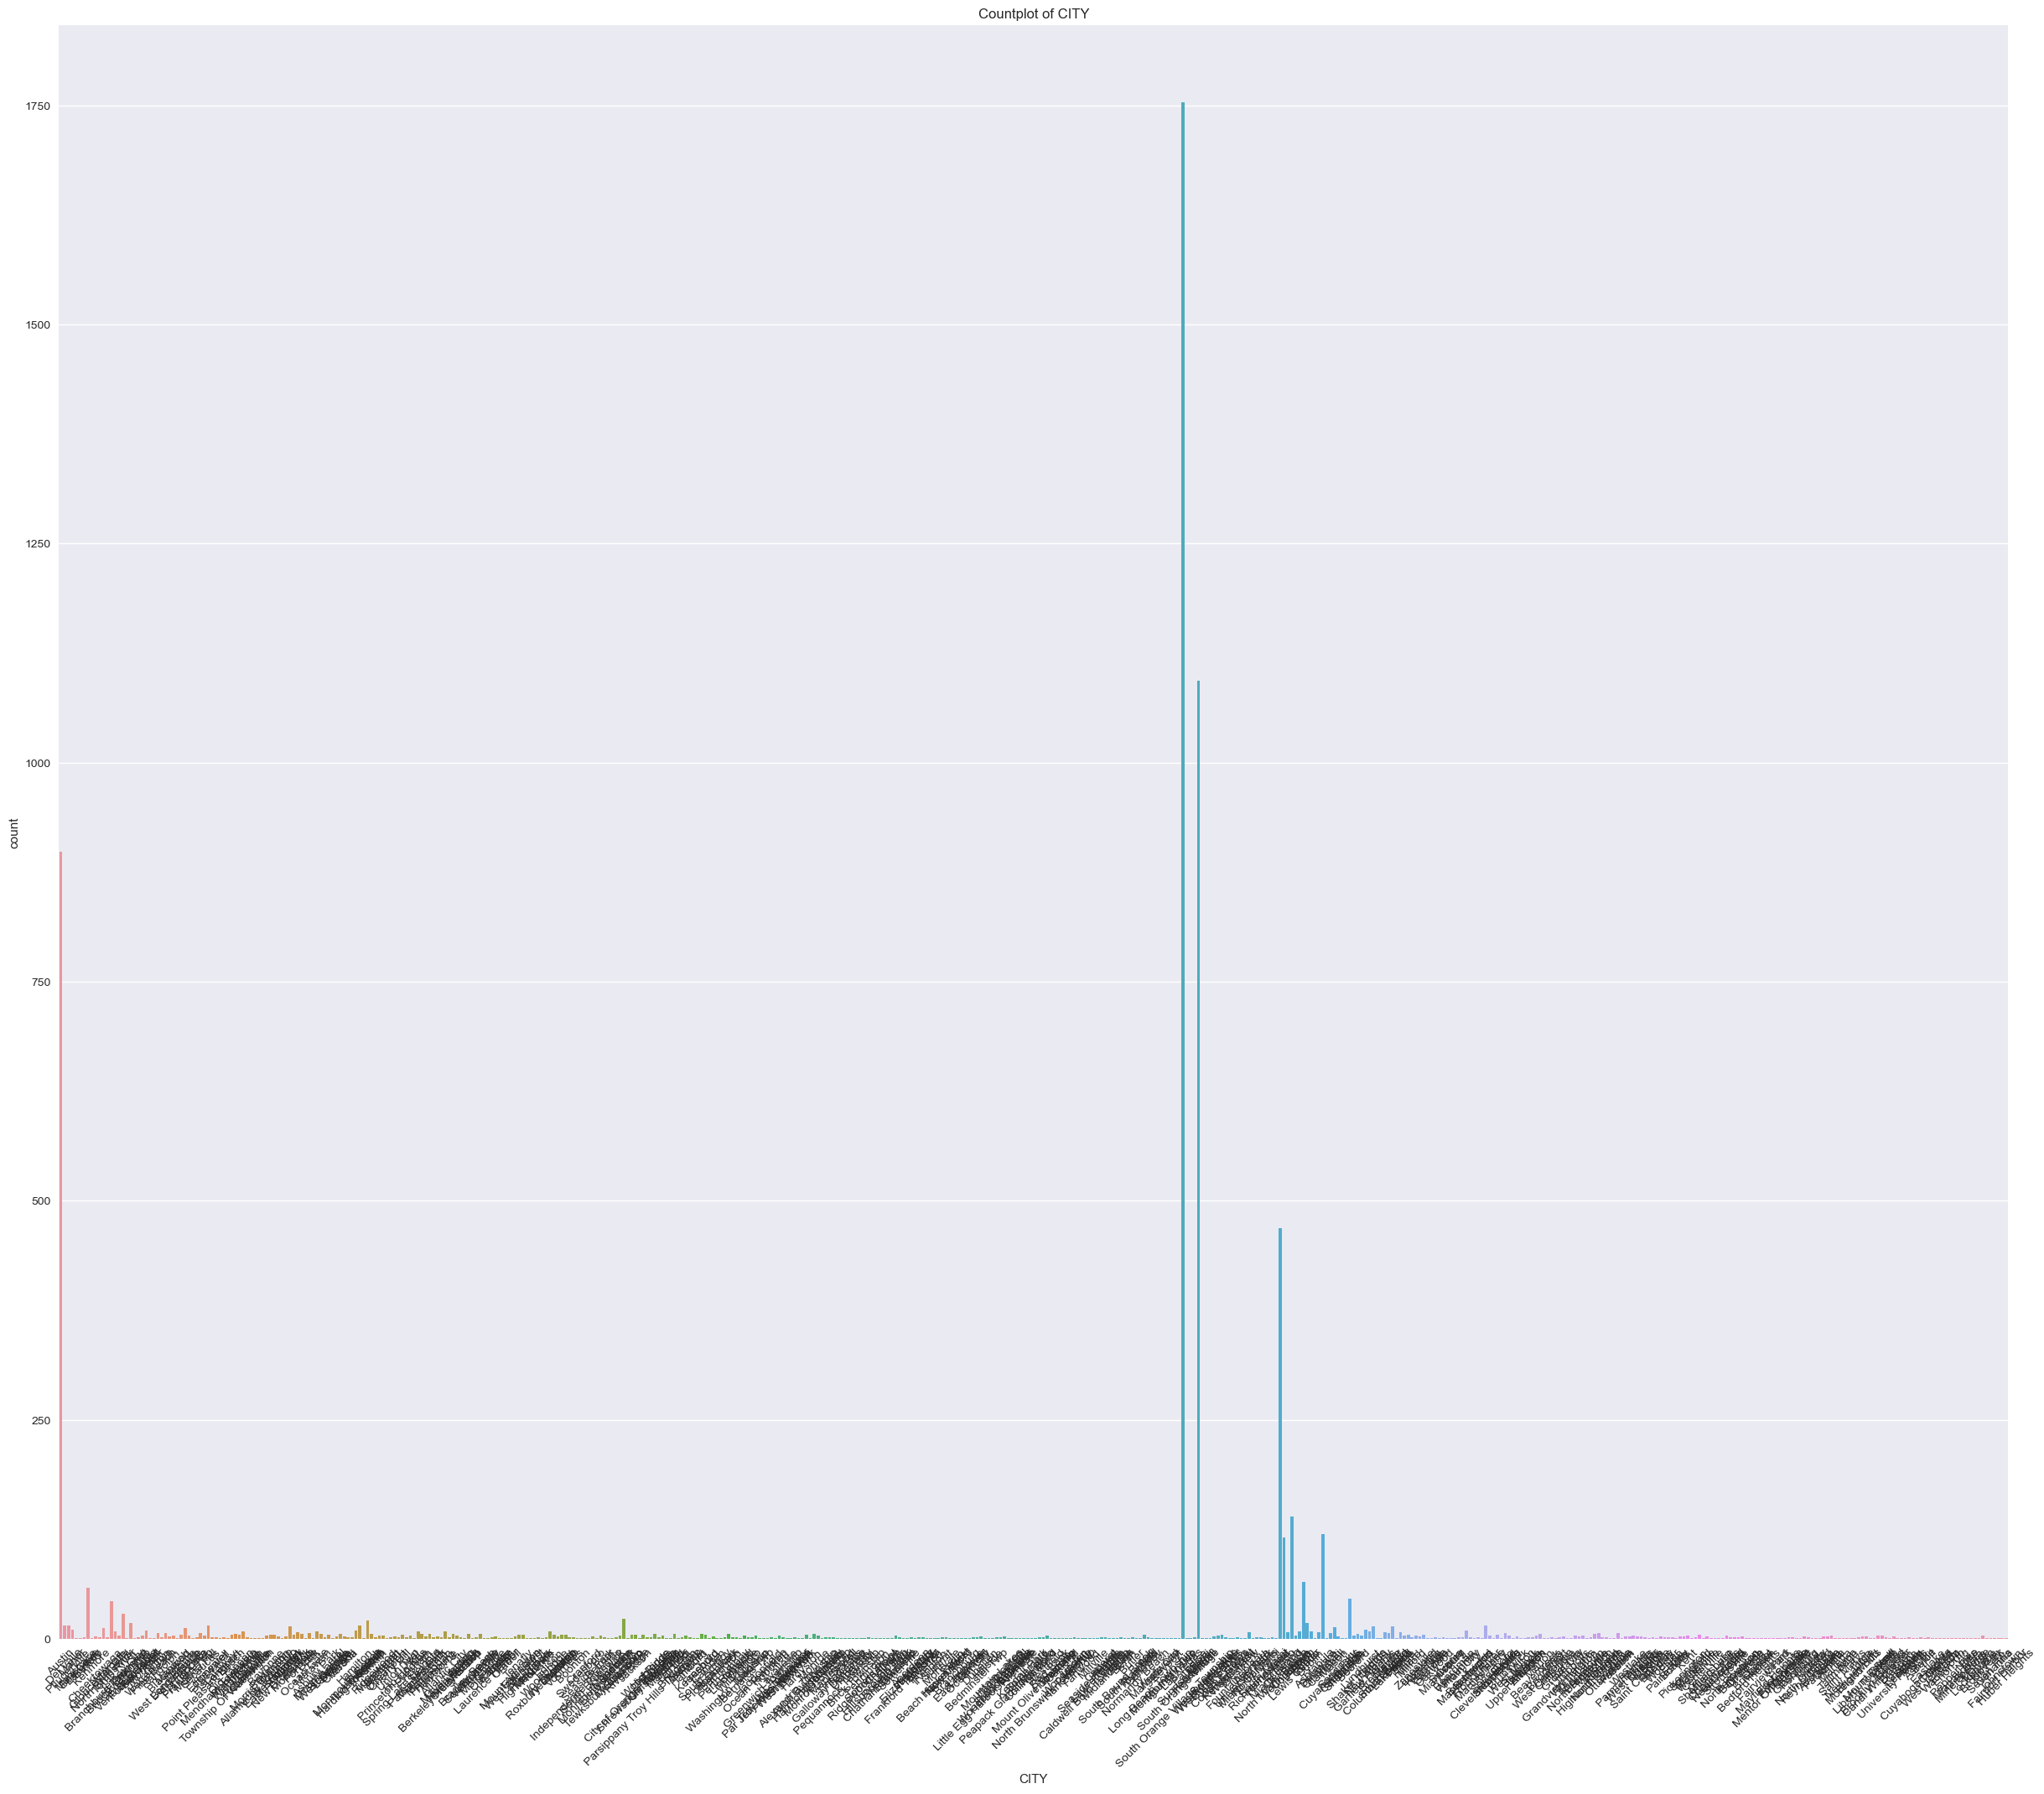

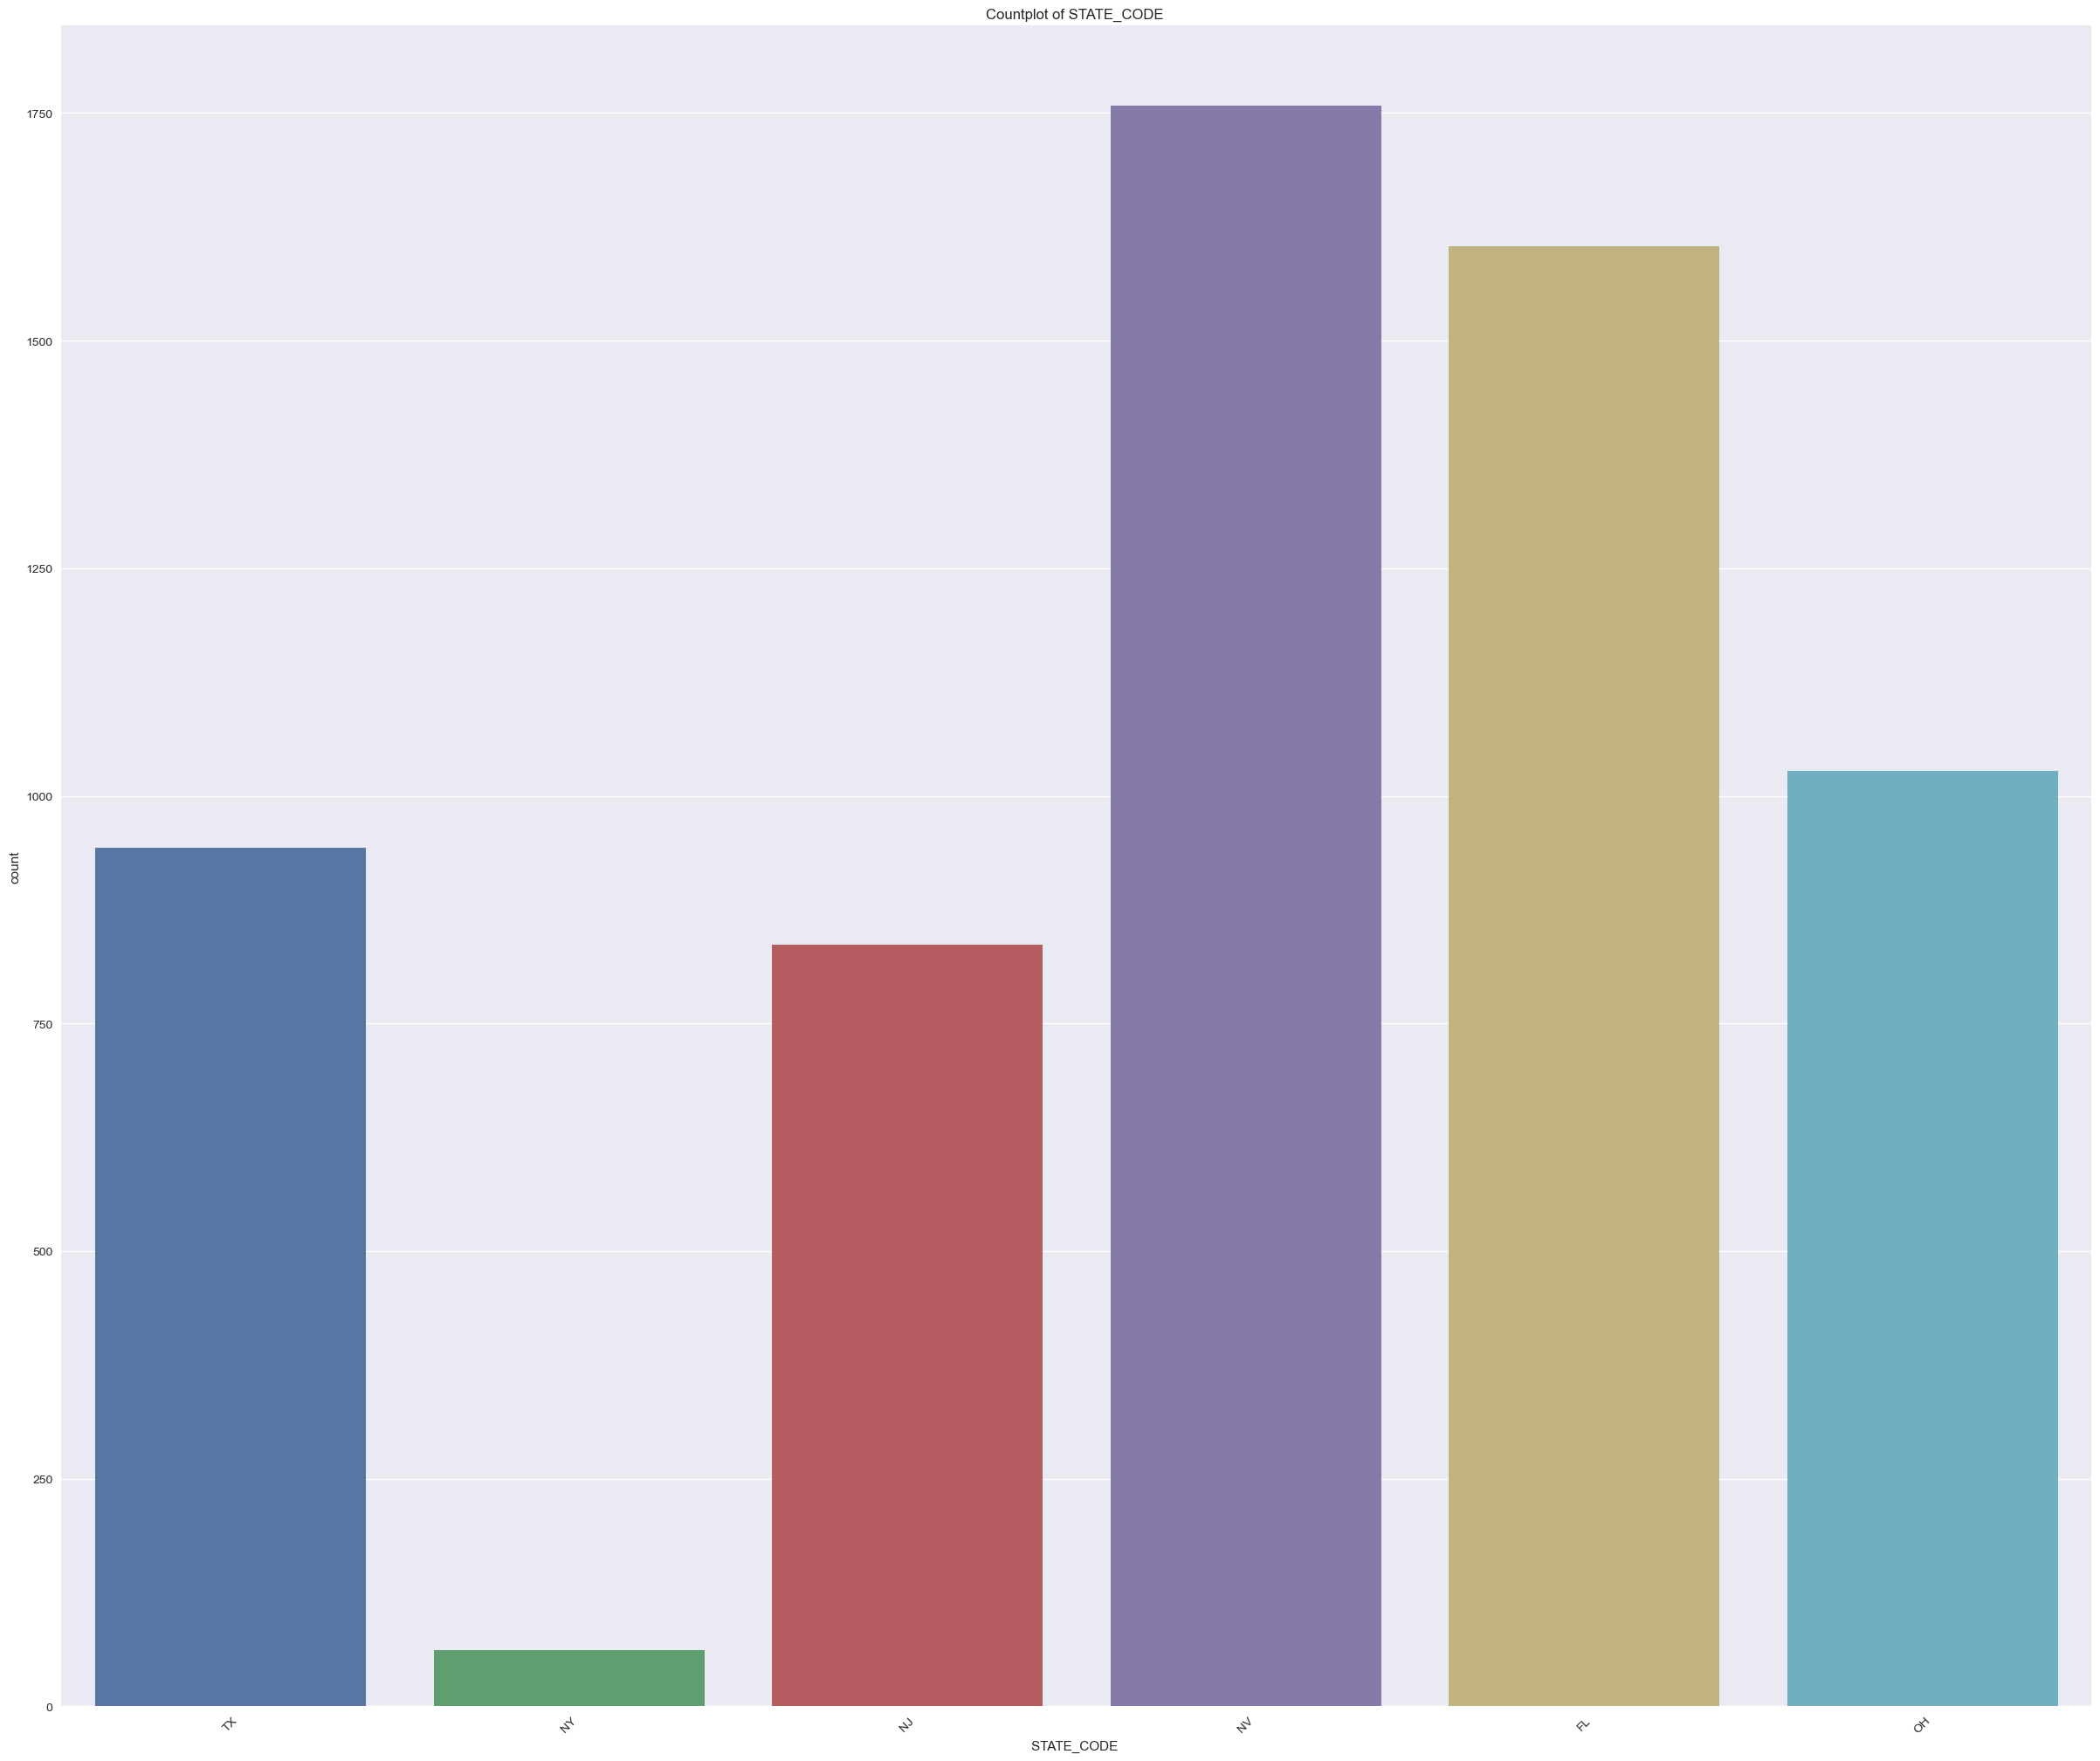

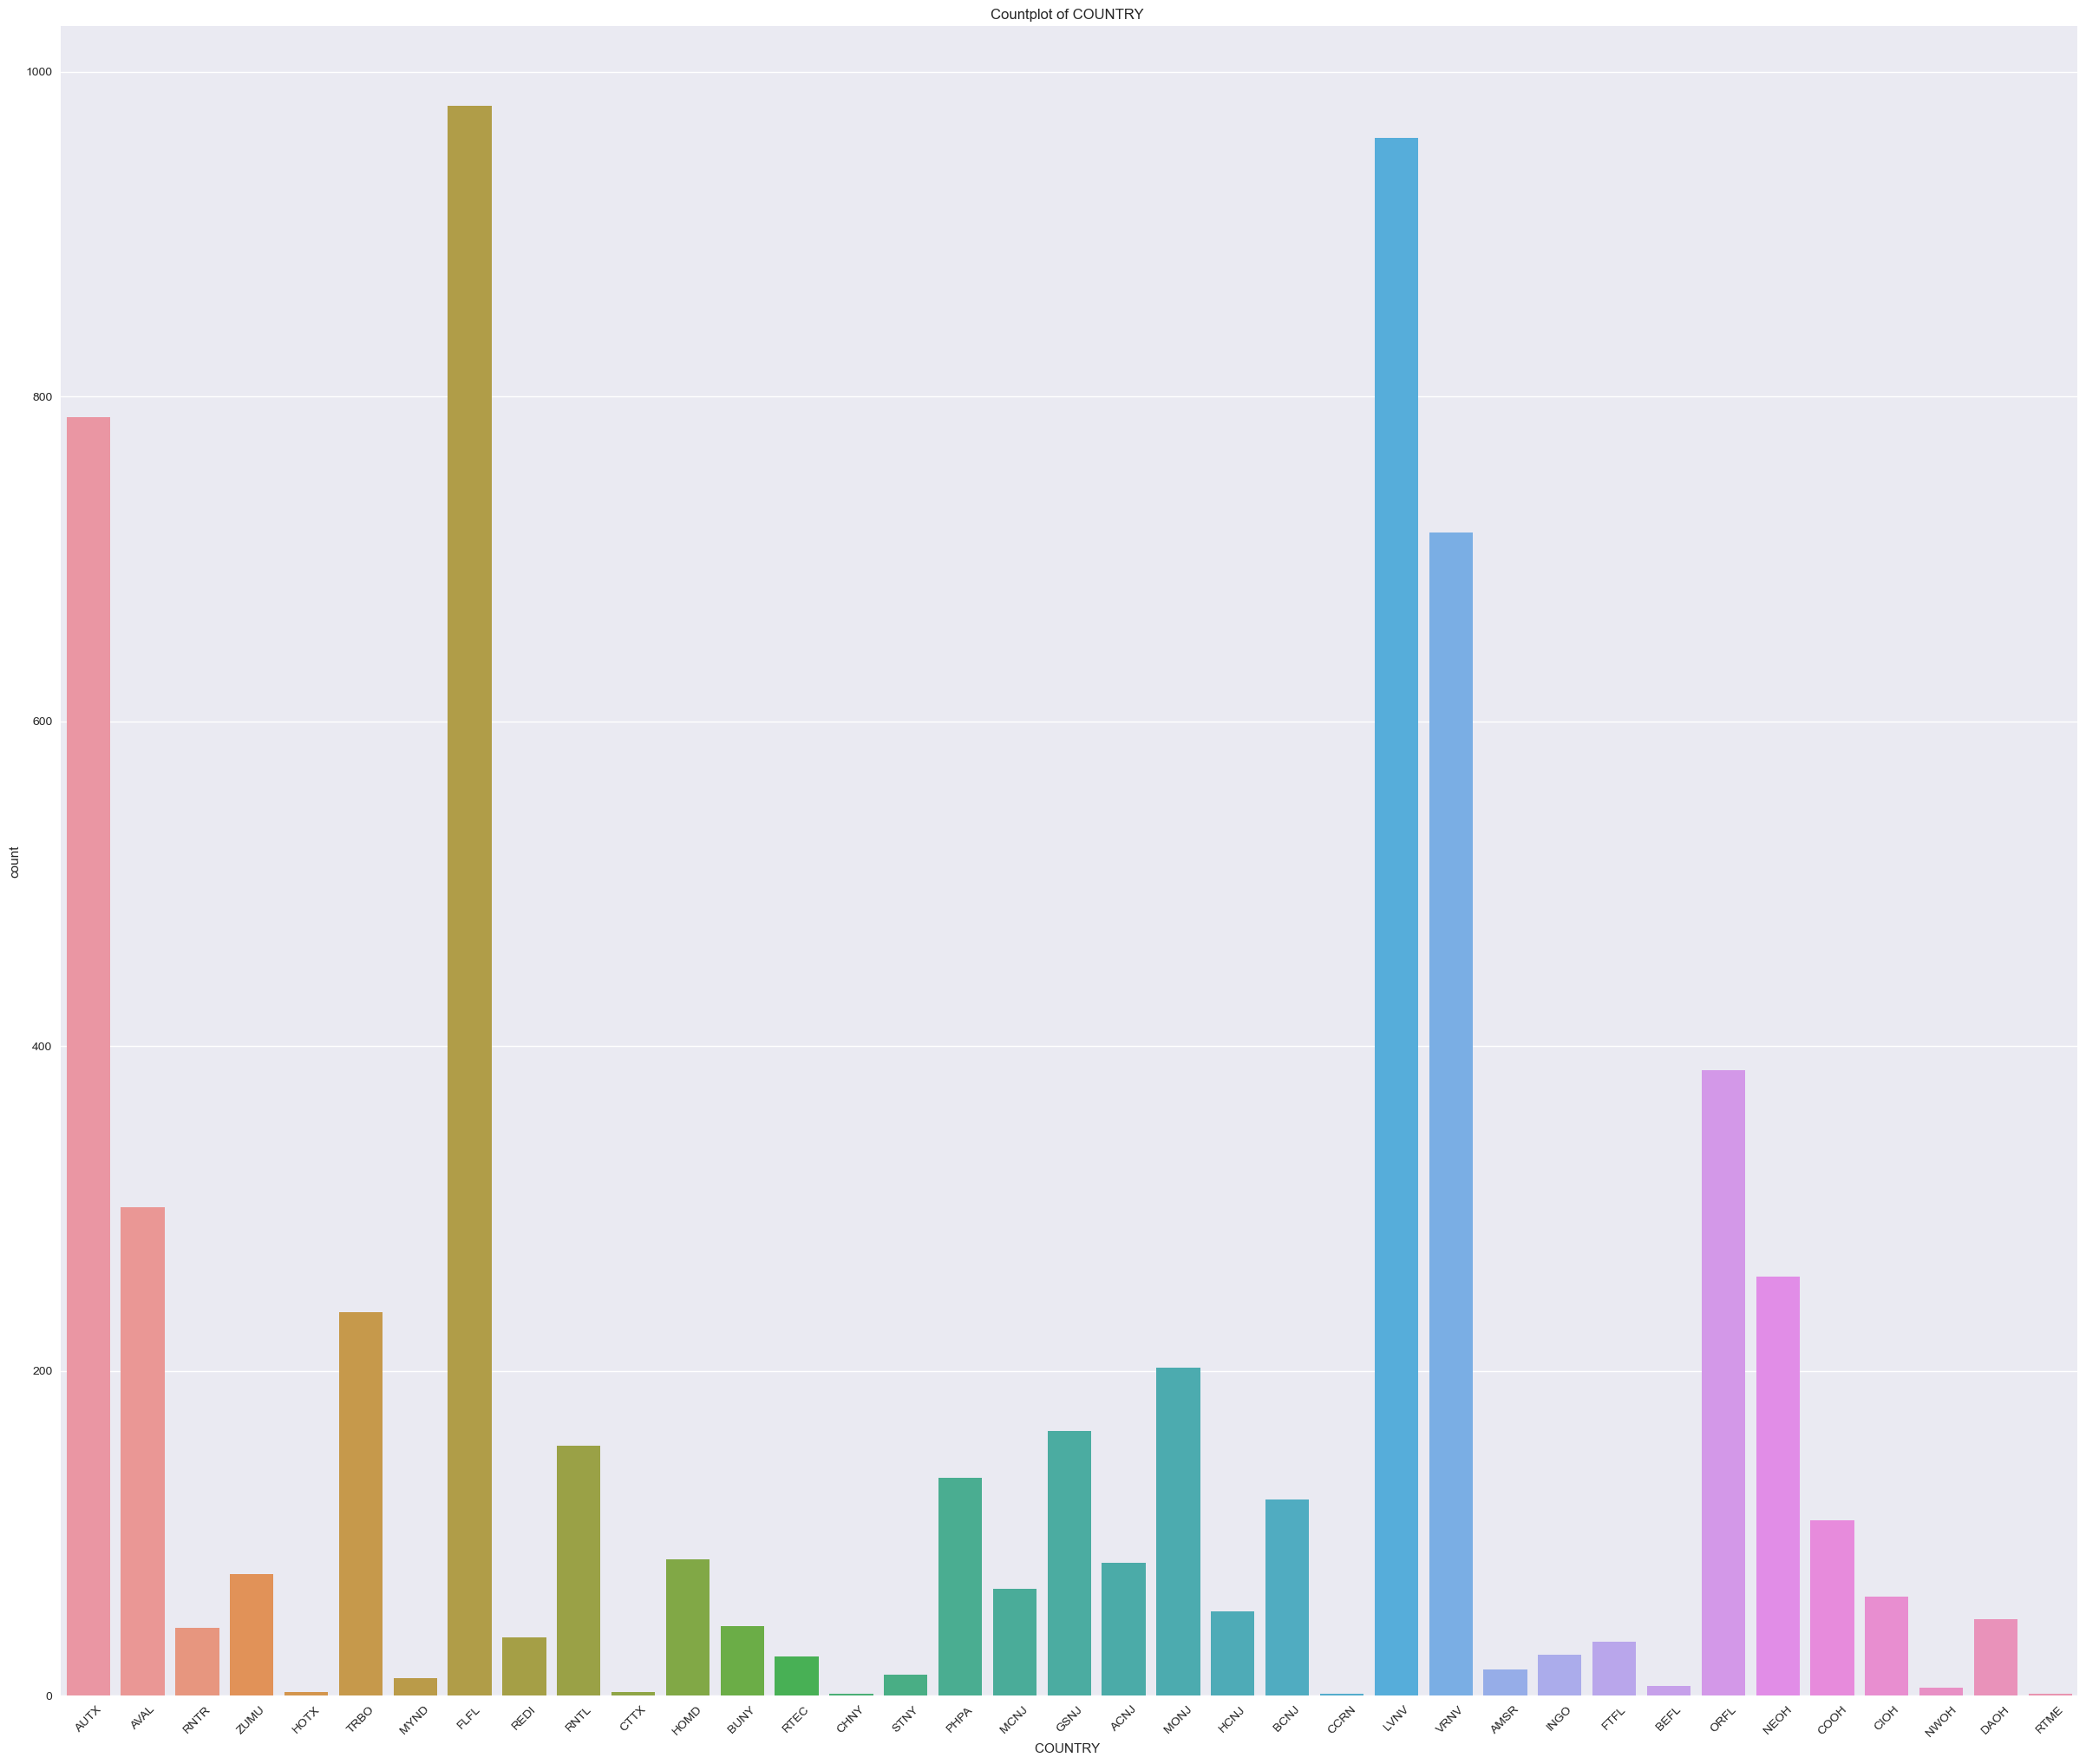

In [14]:
for column in combined_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(30, 25))
    sns.countplot(data=combined_df, x=column)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

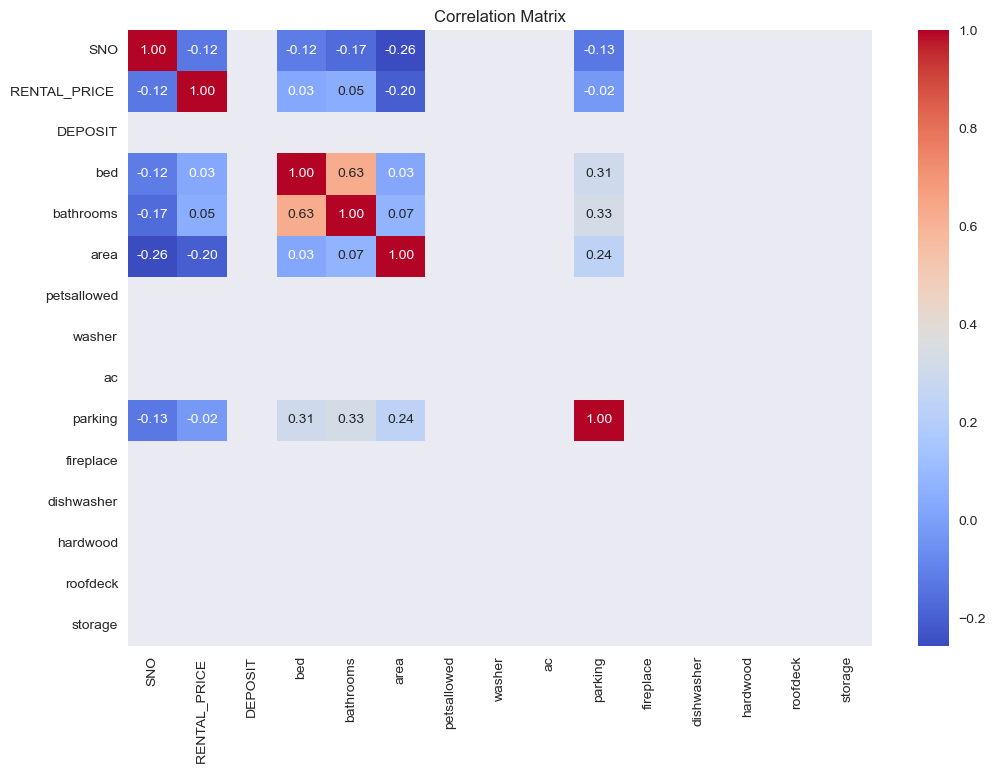

In [14]:
correlation_matrix = combined_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Visualization

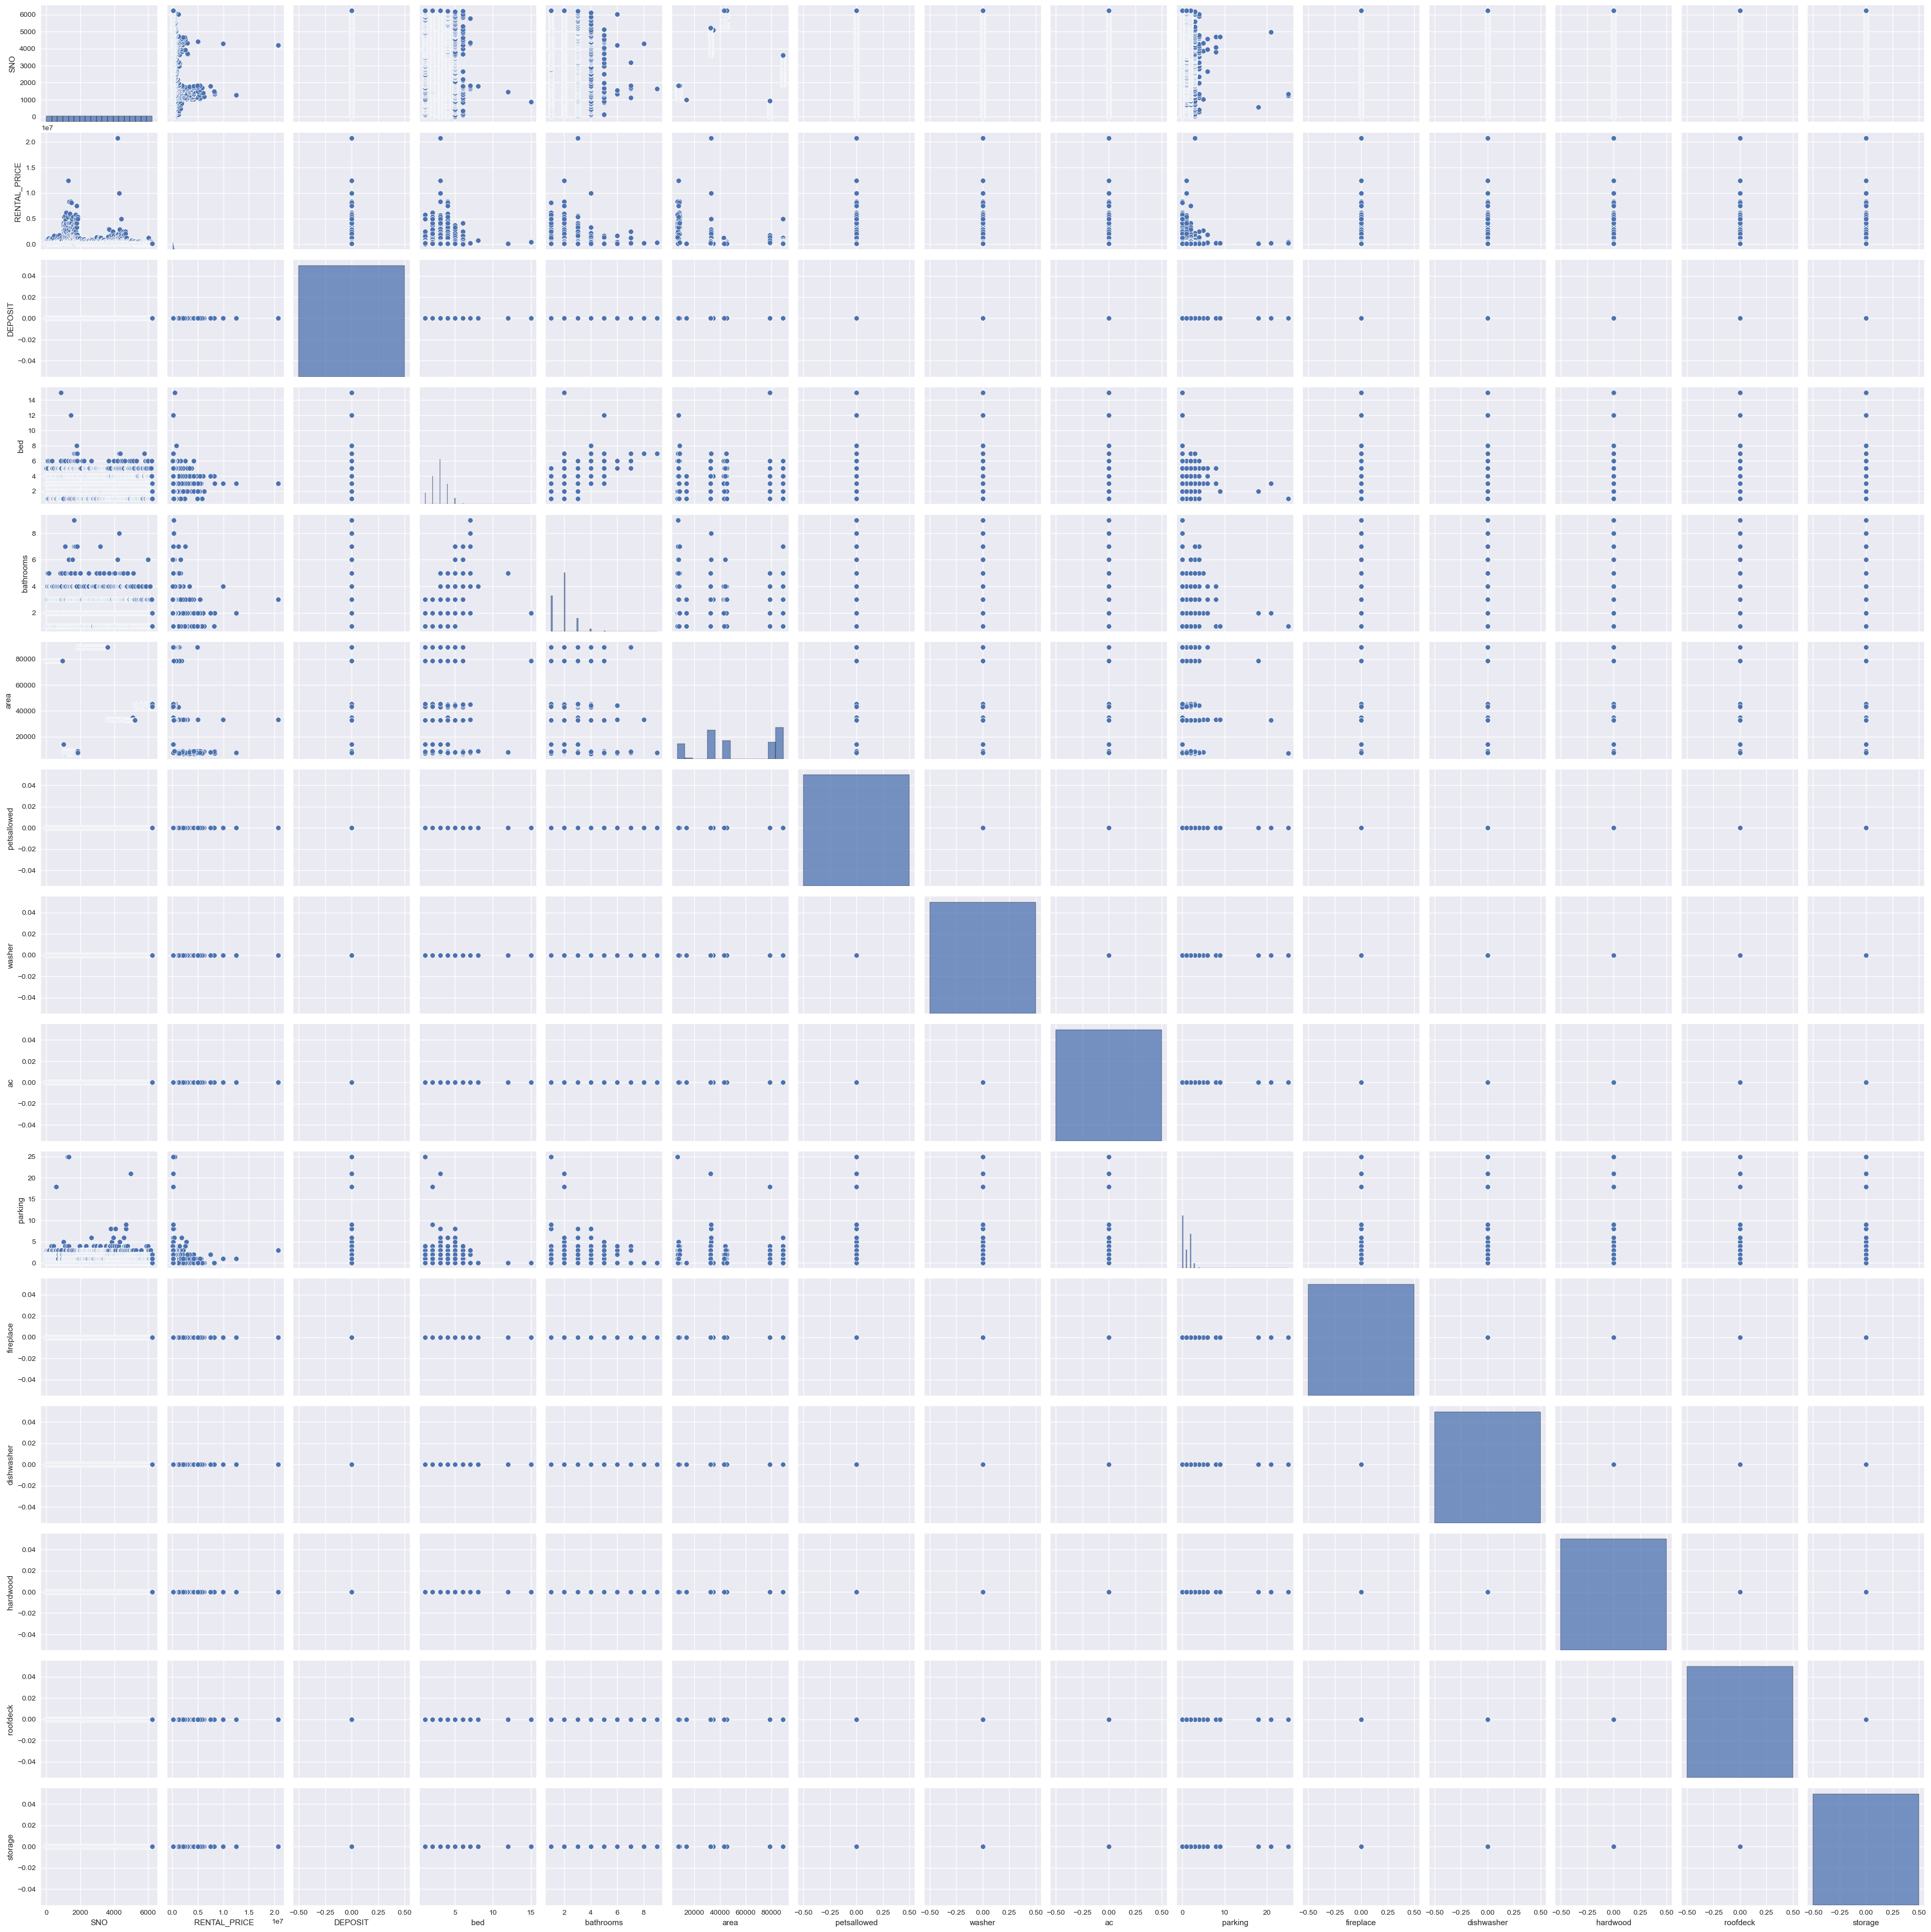

In [15]:
sns.pairplot(combined_df.select_dtypes(include=['int64', 'float64']))
plt.show()

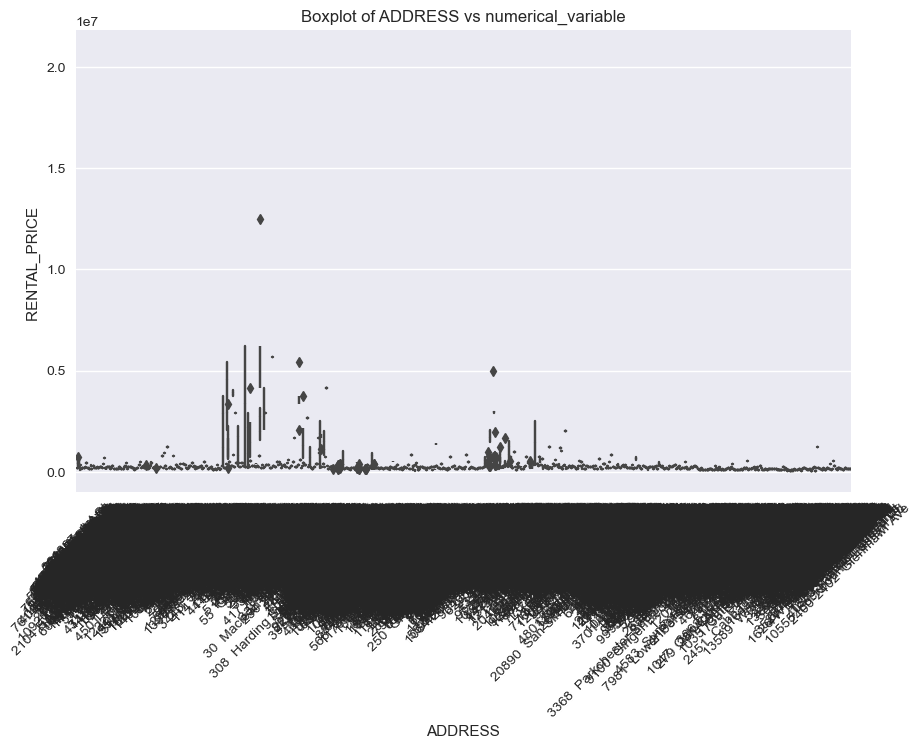

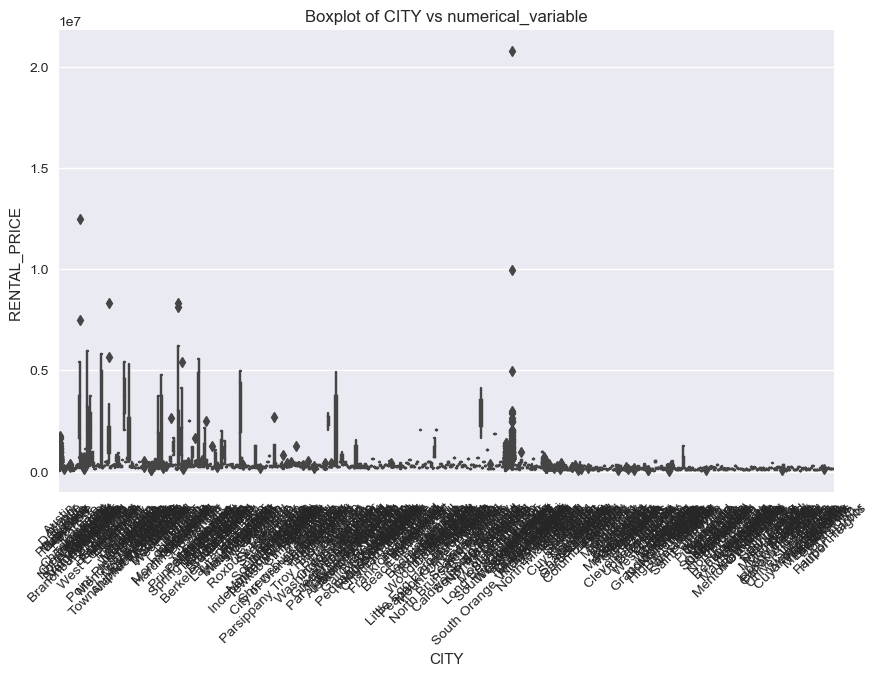

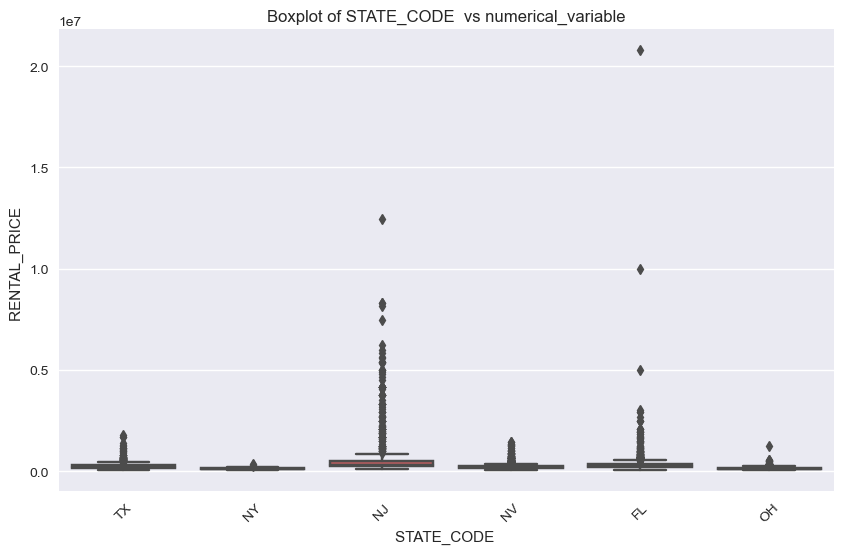

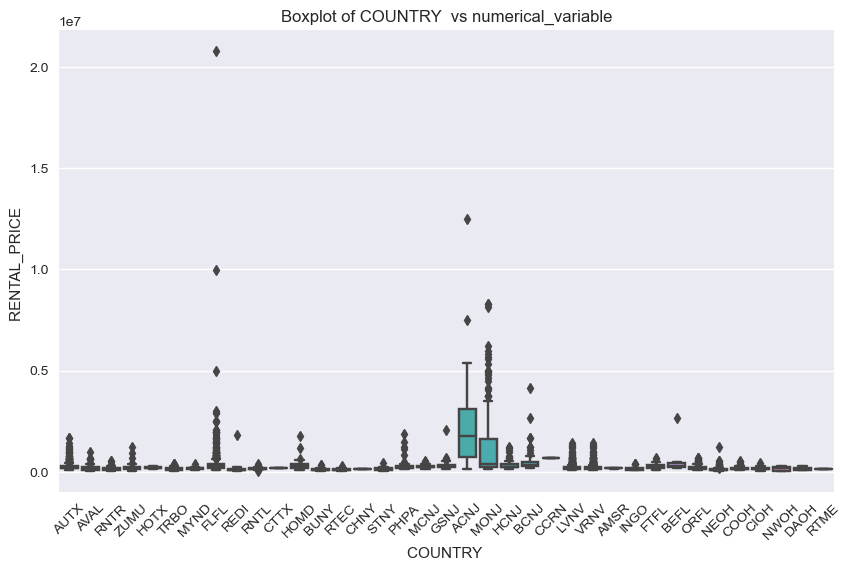

In [17]:
for column in combined_df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=combined_df, x=column, y='RENTAL_PRICE ')
    plt.title(f'Boxplot of {column} vs numerical_variable')
    plt.xticks(rotation=45)
    plt.show()

# RENTAL_PRICE MODELS AND PREDICTIONS

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from joblib import dump

In [7]:
X = combined_df[['bed']] 
y_area = combined_df['RENTAL_PRICE ']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_area, test_size=0.2, random_state=42)

In [88]:
X_train, X_test, y_rental_train, y_rental_test, y_area_train, y_area_test = train_test_split(
X_scaled, y_area, test_size=0.2, random_state=42)

ValueError: not enough values to unpack (expected 6, got 4)

# RandomForestRegressor

In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]})

In [22]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [23]:
best_model = grid_search.best_estimator_
model_name = 'rental_price_model.joblib'
dump(best_model, model_name)

['rental_price_model.joblib']

In [24]:
print(f"Best model saved as {model_name}, MSE: {mse}")

Best model saved as rental_price_model.joblib, MSE: 434789723470.53094


In [25]:
X = combined_df[['bed', 'bathrooms']]  # Use two numeric columns
y_rental = combined_df['RENTAL_PRICE ']

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_rental, test_size=0.2, random_state=42)

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [30]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_area, test_size=0.2, random_state=42)

In [33]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [34]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [35]:
best_model = grid_search.best_estimator_
model_name = 'rental_price_model.joblib'
dump(best_model, model_name)

print(f"Best model saved as {model_name}, MSE: {mse}")

Best model saved as rental_price_model.joblib, MSE: 433405205725.5095


In [36]:
# Model selection and hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [37]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [38]:
best_model = grid_search.best_estimator_
model_name = 'rental_price_model.joblib'
dump(best_model, model_name)

print(f"Best model saved as {model_name}, MSE: {mse}")

Best model saved as rental_price_model.joblib, MSE: 433405205725.5095


# 'Gradient Boosting'

In [39]:
#Model selection and hyperparameter tuning
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

In [40]:
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7]
    },
    'SVR': {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }
}

best_models = {}

for name, model in models.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_

In [41]:
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = mse

# Save the best model
best_model_name = min(results, key=results.get)
best_model = best_models[best_model_name]
model_name = f'{best_model_name}_rental_price_model.joblib'
dump(best_model, model_name)

print(f"Best model saved as {model_name}, MSE: {results[best_model_name]}")

Best model saved as Random Forest_rental_price_model.joblib, MSE: 433473360142.8033


# XGBRegressor

In [42]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}
xgb = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
          

In [43]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [44]:
best_model = grid_search.best_estimator_
model_name = 'rental_price_model_xgb.joblib'
dump(best_model, model_name)

print(f"Best model saved as {model_name}, MSE: {mse}")

Best model saved as rental_price_model_xgb.joblib, MSE: 433931465604.1288


# LGBMRegressor

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

In [11]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}
lgbm = LGBMRegressor(random_state=42)
grid_search = GridSearchCV(lgbm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 4984, number of used features: 1
[LightGBM] [Info] Start training from score 303087.857782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [12]:
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [13]:
best_model = grid_search.best_estimator_
model_name = 'rental_price_model_lgbm.joblib'
dump(best_model, model_name)

print(f"Best model saved as {model_name}, MSE: {mse}")

Best model saved as rental_price_model_lgbm.joblib, MSE: 434225009744.8123


Based on the provided MSE values, the best model appears to be the one saved as rental_price_model_lgbm.joblib, as it has the lowest MSE of approximately 433406377692.7875.

Observations:

LightGBM (LGBM) has the lowest MSE among the models listed, indicating that it may be the most accurate model for predicting rental prices.
XGBoost has a slightly higher MSE than LightGBM, suggesting it might be slightly less accurate for this task.
Random Forest has a higher MSE compared to both LightGBM and XGBoost, indicating that it may be the least accurate model among the three.

# AREA MODELS AND PREDICTONS

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump

In [54]:
combined_df

,SNO,ADDRESS,CITY,STATE_CODE,COUNTRY,RENTAL_PRICE,DEPOSIT,bed,bathrooms,area,petsallowed,washer,ac,parking,fireplace,dishwasher,hardwood,roofdeck,storage
0,1,5916 Lehman Way,Austin,TX,AUTX,224424.0,0,5,3.0,78747,0,0,0,3,0,0,0,0,0
1,2,10725 Blacket Dr,Austin,TX,AVAL,228580.0,0,4,3.0,78747,0,0,0,0,0,0,0,0,0
2,3,2910 Cedarview Dr,Austin,TX,AUTX,602620.0,0,3,2.0,78704,0,0,0,2,0,0,0,0,0
3,4,3812 Southway Dr,Austin,TX,RNTR,228580.0,0,2,2.0,78704,0,0,0,0,0,0,0,0,0
4,5,222 West Ave,Austin,TX,AUTX,245204.0,0,1,1.0,78701,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,6230,3668 Bradley Rd,Westlake,OH,NEOH,191176.0,0,3,2.0,45239,0,0,0,0,0,0,0,0,0
6227,6231,3605 Randolph Rd,Cleveland Heights,OH,NEOH,97666.0,0,3,2.0,45067,0,0,0,0,0,0,0,0,0
6228,6232,6074 N Norwell Dr,Dayton,OH,DAOH,91432.0,0,3,2.0,43068,0,0,0,0,0,0,0,0,0
6229,6233,7033 Acre Dr,Cincinnati,OH,RNTL,143382.0,0,3,1.0,45373,0,0,0,0,0,0,0,0,0


In [55]:
X = combined_df[['bed', 'bathrooms']]  
y_area = combined_df['area']


In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_area, test_size=0.2, random_state=42)


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from joblib import dump

In [59]:
X = combined_df.drop(columns=['RENTAL_PRICE ', 'area']) 
y_rental = combined_df['RENTAL_PRICE ']
y_area = combined_df['area']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rental, test_size=0.2, random_state=42)


In [61]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [62]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# RandomForestRegressor

In [64]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [65]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SNO', 'DEPOSIT', 'bed', 'bathrooms', 'petsallowed', 'washer', 'ac',
       'parking', 'fireplace', 'dishwasher', 'hardwood', 'roofdeck',
       'storage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

In [66]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [67]:
model_name = 'rental_price_model_with_object_columns.joblib'
dump(model, model_name)

print(f"Model saved as {model_name}, MSE: {mse}")

Model saved as rental_price_model_with_object_columns.joblib, MSE: 317849415366.4001


# GradientBoostingRegressor

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

In [69]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

In [70]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SNO', 'DEPOSIT', 'bed', 'bathrooms', 'petsallowed', 'washer', 'ac',
       'parking', 'fireplace', 'dishwasher', 'hardwood', 'roofdeck',
       'storage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

In [71]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [72]:
model_name = 'rental_price_model_gradient_boosting.joblib'
dump(model, model_name)

print(f"Model saved as {model_name}, MSE: {mse}")

Model saved as rental_price_model_gradient_boosting.joblib, MSE: 314142725767.8853


# SVR regressor

In [73]:
from sklearn.svm import SVR

In [74]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

In [75]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SNO', 'DEPOSIT', 'bed', 'bathrooms', 'petsallowed', 'washer', 'ac',
       'parking', 'fireplace', 'dishwasher', 'hardwood', 'roofdeck',
       'storage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

In [76]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


In [77]:
model_name = 'rental_price_model_svr.joblib'
dump(model, model_name)

print(f"Model saved as {model_name}, MSE: {mse}")

Model saved as rental_price_model_svr.joblib, MSE: 450913204657.5946


# MLPRegressor

In [78]:
from sklearn.neural_network import MLPRegressor

In [79]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(random_state=42))
])

In [80]:
model.fit(X_train, y_train)


C:\Users\Mounisha S\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SNO', 'DEPOSIT', 'bed', 'bathrooms', 'petsallowed', 'washer', 'ac',
       'parking', 'fireplace', 'dishwasher', 'hardwood', 'roofdeck',
       'storage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                       

In [81]:
model_name = 'rental_price_model_mlp.joblib'
dump(model, model_name)

print(f"Model saved as {model_name}, MSE: {mse}")

Model saved as rental_price_model_mlp.joblib, MSE: 450913204657.5946


Based on the provided MSE values, the best model appears to be the one saved as rental_price_model_gradient_boosting.joblib, as it has the lowest MSE of approximately 314142725767.8853.


Gradient Boosting has the lowest MSE among the models listed, indicating that it may be the most accurate model for predicting rental prices.
The model saved as rental_price_model_with_object_columns.joblib has a higher MSE compared to Gradient Boosting, suggesting it might be slightly less accurate for this task.
Support Vector Regression (SVR) and Multi-layer Perceptron (MLP) have the same MSE, which is higher than the other models, indicating that they may be the least accurate models among the four.

Based on the MSE values provided, the best model for predicting rental prices is ambiguous due to conflicting information. Let's summarize the observations and conclude based on the combined information:

LightGBM vs. Gradient Boosting:

LightGBM (MSE: 433406377692.7875) had the lowest MSE among the initial models.
Gradient Boosting (MSE: 314142725767.8853) had the lowest MSE among the newer models.
XGBoost and Random Forest:

XGBoost (MSE: 433931465604.1288) and Random Forest (MSE: 433923521233.6548) had similar, higher MSE values compared to LightGBM.
Other Models (SVR, MLP, Generic Model):

SVR (MSE: 450913204657.5946) and MLP (MSE: 450913204657.5946) had the highest MSE among all models.